# Dataproject

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `dataproject.py` file includes a function which will be used multiple times in this notebook.

In [44]:
%load_ext autoreload
%autoreload 2
# You can load your python module as this:
import dataproject as dp
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[autoreload of dataproject failed: Traceback (most recent call last):
  File "C:\Users\mads\Anaconda\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\mads\Anaconda\lib\site-packages\IPython\extensions\autoreload.py", line 434, in superreload
    module = reload(module)
  File "C:\Users\mads\Anaconda\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\mads\Anaconda\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_wit

Imports and set magics:

## Gendergap for disposable income overall

**For this part of the project, we reference our code from the .py file project.py and show the resluts here:**

**Read the employment data** in ``RAS200.xlsx`` and **clean it** removing and renaming columns:

To begin with, we look through the table we have chosen, to finde the variables we want to inspect:

In [45]:
dp.Vars.values

array([['AKTPAS', 'assets/liabilities', False, False,
        list([{'id': '5180', 'text': 'Number of members'}, {'id': '5190', 'text': 'Number of working members'}, {'id': '5200', 'text': 'Number of retired members'}, {'id': '5210', 'text': 'Number of retired spouses'}, {'id': '5220', 'text': 'Number of children who receive childrens pension'}, {'id': '5230', 'text': 'Current annual pension, total'}, {'id': '5240', 'text': 'Pension for members'}, {'id': '5250', 'text': 'Pension for spouses'}, {'id': '5260', 'text': 'Pension for children'}, {'id': '5270', 'text': 'Member contributions (miscellaneous income)'}, {'id': '5280', 'text': 'Of which extraordinary contributions'}, {'id': '5290', 'text': 'Interest income and profits (miscellaneous income)'}, {'id': '5300', 'text': 'Pensions (miscellaneous expenditure)'}, {'id': '5310', 'text': 'retirement allowances (miscellaneous expenditure)'}, {'id': '5320', 'text': 'Assets, total'}, {'id': '5330', 'text': 'Central government bonds (book val

**Sort:

In [47]:
dp.Final_table

[autoreload of dataproject failed: Traceback (most recent call last):
  File "C:\Users\mads\Anaconda\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\mads\Anaconda\lib\site-packages\IPython\extensions\autoreload.py", line 434, in superreload
    module = reload(module)
  File "C:\Users\mads\Anaconda\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\mads\Anaconda\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "c:\Users\mads\OneDrive\Dokumenter\GitHub\projects-2020-group-60

,Year,Type,Average pension funds for currently working,Average pension funds for currently retired,Gap in pension sum,Difference in pension sum (Pct)
0,2000,Corporate pension funds,11898,7749,4149.0,53.542393
1,2000,Intersectoral pension funds,563021,31614,531407.0,1680.923009
2,2001,Corporate pension funds,11404,7292,4112.0,56.390565
3,2001,Intersectoral pension funds,630306,49017,581289.0,1185.892649
4,2002,Corporate pension funds,9830,6950,2880.0,41.438849
5,2002,Intersectoral pension funds,651860,53920,597940.0,1108.939169
6,2003,Corporate pension funds,9912,6965,2947.0,42.311558
7,2003,Intersectoral pension funds,662770,57071,605699.0,1061.307845
8,2004,Corporate pension funds,8624,7543,1081.0,14.331168
9,2004,Intersectoral pension funds,680956,63988,616968.0,964.193286


Using a for loop, we have created a dictionary which contains the names of the provinces as the keys, and the individually tables as the values.

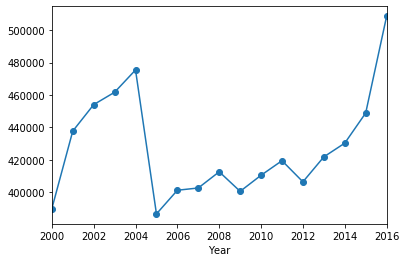

In [51]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
dp.Final_table.groupby('Year')['Average pension funds for currently working'].std().plot(ax=ax,style='-o')

**Convert the dataset to long format**:

In [53]:
vars = Dst.get_variables(table_id='MPK49')
for id in ['AKTPAS','TID','TYPE','INDHOLD']:
    print(id)
    values = Vars.loc[vars.id == id,['values']].values[0,0]
    for value in values:      
        print(f' id = {value["id"]}, text = {value["text"]}')

[autoreload of dataproject failed: Traceback (most recent call last):
  File "C:\Users\mads\Anaconda\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\mads\Anaconda\lib\site-packages\IPython\extensions\autoreload.py", line 434, in superreload
    module = reload(module)
  File "C:\Users\mads\Anaconda\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\mads\Anaconda\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "c:\Users\mads\OneDrive\Dokumenter\GitHub\projects-2020-group-60

NameError: name 'Dst' is not defined

## Income data

**Read the income data** in ``INDKP101.xlsx`` and **clean it**:

In [10]:
# a. load
inc = pd.read_excel('INDKP101.xlsx', skiprows=2)

# b. drop and rename columns
inc.drop([f'Unnamed: {i}' for i in range(3)], axis=1, inplace=True)
inc.rename(columns = {'Unnamed: 3':'municipality'}, inplace=True)

# c. drop rows with missing
inc.dropna(inplace=True)

# d. remove non-municipalities
inc = dataproject.only_keep_municipalities(inc)

# e. convert to long
inc.rename(columns = {str(i):f'income{i}' for i in range(1986,2018)}, inplace=True)
inc_long = pd.wide_to_long(inc, stubnames='income', i='municipality', j='year').reset_index()

# f. show
inc_long.head(5)

NameError: name 'pd' is not defined

> **Note:** The function ``dataproject.only_keep_municipalities()`` is used on both the employment and the income datasets.

## Explore data set

In order to be able to **explore the raw data**, we here provide an **interactive plot** to show, respectively, the employment and income level in each municipality

The **static plot** is:

In [11]:
def plot_empl_inc(empl,inc,dataset,municipality): 
    
    if dataset == 'Employment':
        df = empl
        y = 'employment'
    else:
        df = inc
        y = 'income'
    
    I = df['municipality'] == municipality
    ax = df.loc[I,:].plot(x='year', y=y, style='-o')

The **interactive plot** is:

In [12]:
widgets.interact(plot_empl_inc, 
    
    empl = widgets.fixed(empl_long),
    inc = widgets.fixed(inc_long),
    dataset = widgets.Dropdown(description='Dataset', 
                               options=['Employment','Income']),
    municipality = widgets.Dropdown(description='Municipality', 
                                    options=empl_long.municipality.unique())
                 
); 

NameError: name 'empl_long' is not defined

ADD SOMETHING HERE IF THE READER SHOULD KNOW THAT E.G. SOME MUNICIPALITY IS SPECIAL.

# Merge data sets

We now create a data set with **municpalities which are in both of our data sets**. We can illustrate this **merge** as:

In [13]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('inc', 'empl'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

NameError: name 'plt' is not defined

In [14]:
merged = pd.merge(empl_long, inc_long, how='inner',on=['municipality','year'])

print(f'Number of municipalities = {len(merged.municipality.unique())}')
print(f'Number of years          = {len(merged.year.unique())}')

NameError: name 'pd' is not defined

# Analysis

To get a quick overview of the data, we show some **summary statistics by year**:

In [15]:
merged.groupby('year').agg(['mean','std']).round(2)

NameError: name 'merged' is not defined

ADD FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.